In [1]:
from utils import * 
from algorithms import *
from agents import *

In [10]:
numRounds, numPeriods, numSteps = 1, 10000, 10
numBuyers, numSellers, numTokens = 4, 4, 4
gameTypes, seed = '1111', 42
disclosure = []
depth = 1
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = 1
num_states = numStates = 14
disclosure = ['currentAsk', 'currentAskIdx', 'currentBid', 'currentBidIdx', 'bids', 'asks']
depth = 1
buyers = [Reinforcer(gameData, disclosure=disclosure, index=0, buyer=1, reinforcer=1, numStates = num_states, algo='PPO1', algoArgs = [num_states]),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
        #ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [11]:
print_interval = 100
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    score = 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        currentAsk, currentAskIdx, currentBid, currentBidIdx, price, buy, sell = -1, -1, -1, -1, -1, -1, -1
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = generateState(buyers[0], disclosure, depth)
            #print(buyers[0].state)

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState  = generateState(buyers[0], disclosure, depth)
            #print(buyers[0].newState)



            # load data and train
            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%print_interval==0:
            print(score/print_interval)
            score = 0.0
    endRounds(buyers, sellers)

0.23895059646712738
36.158225105847265
43.66213462897169
49.308107778267306
55.55281392248484
59.849192511498956
60.39097719126705
62.80151049745682
63.25811261199721
61.614491391067006
61.85028450123898
62.971924767750444
59.869910831382924
57.770799746191805
57.55964499238559
59.35920744750002
59.792508268744605
62.75159633800756
63.71813666779851
65.39545556617043
64.1065968930687
63.67494215961005
64.320084962281
64.78899288324958
64.84921155094224
64.59631251150235
64.69973982798737
64.7459722716587
65.03942276422238
65.27486287348692
65.52771155777336
64.84524203035994
65.12265759820004
65.0940908263682
65.8796417193082
65.07436857248246
65.8866015889935
64.97830534617067
65.61843044139562
65.42016524804279
66.04349938778573
65.1529037092512
65.20522185600846
65.78003144989776
66.12146232598417
65.81255924685559
65.97831452299216
65.76664504646548
65.35583944167287
65.22803938097454
65.26519890790017
65.58327349755753
64.8988163024375
65.37740754284604
66.26686189298897
65.361572

KeyboardInterrupt: 

In [ ]:
log.graphLearning(rolling_window = 100, trackBuyersIdx=[0], trackSellersIdx=[])

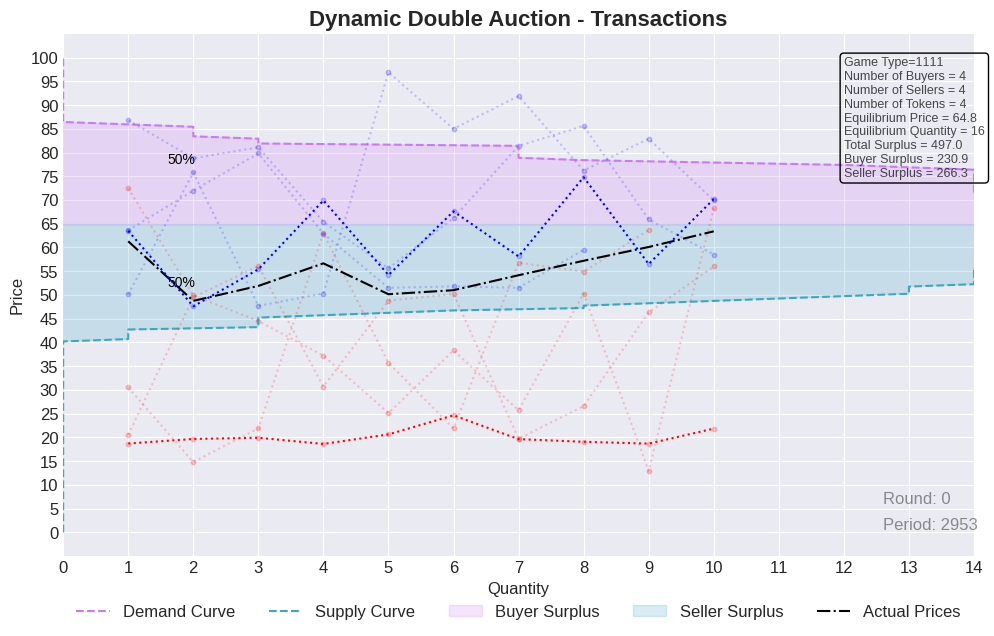

In [8]:
log.graphSales(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [9]:
log.roundData.buyerValues.item()

array([[85.82202637, 81.73001813, 81.63077519, 77.98802756],
       [86.00286066, 81.75851481, 77.79014457, 77.22312836],
       [83.24607464, 78.75300079, 77.92916939, 77.73215368],
       [81.78455651, 76.72373723, 71.09604113, 70.44124563]])

In [10]:
log.stepData.tail(15)

,rnd,period,step,bids,asks,currentBid,currentBidIdx,currentAsk,currentAskIdx,buy,sell,price,sale,bprofit,sprofit
29533,0,2953,3,"[18.605626899973917, 63.0, 30.7, 37.2]","[69.9, 50.3, 62.9, 65.4]",63.0,1,50.3,1,True,True,56.65,True,29.352861,8.387677
29534,0,2953,4,"[20.619593579075495, 35.7, 48.8, 25.1]","[54.2, 96.9, 51.5, 55.6]",48.8,2,51.5,2,True,True,50.15,True,28.603001,7.348802
29535,0,2953,5,"[24.63711762732741, 21.9, 50.2, 38.3]","[67.6, 85.0, 51.8, 66.2]",50.2,2,51.8,2,True,True,51.00,True,26.929169,4.311633
29536,0,2953,6,"[19.62010416003472, 56.8, 19.7, 25.7]","[58.1, 91.9, 51.5, 81.4]",56.8,1,51.5,2,True,True,54.15,True,27.608515,4.752205
29537,0,2953,7,"[19.06252470750899, 54.9, 26.6, 50.3]","[74.8, 76.2, 59.5, 85.6]",54.9,1,59.5,2,True,True,57.20,True,20.590145,6.950800
29538,0,2953,8,"[18.677568997255293, 63.7, 46.3, 12.9]","[56.5, 82.9, nan, 65.9]",63.7,1,56.5,0,True,True,60.10,True,17.123128,14.546905
29539,0,2953,9,"[21.83378364808376, nan, 56.0, 68.3]","[70.2, 69.9, nan, 58.5]",68.3,3,58.5,3,True,True,63.40,True,7.696041,16.327320
29540,0,2954,0,"[26.16067736024722, 81.5, 40.3, 44.2]","[48.9, 54.7, 58.2, 85.9]",81.5,1,48.9,0,True,True,65.20,True,20.802861,22.353759
29541,0,2954,1,"[21.065375385338, 65.4, 27.8, 59.7]","[57.3, 44.3, 74.5, 64.5]",65.4,1,44.3,1,True,True,54.85,True,26.908515,14.234515
29542,0,2954,2,"[19.083136154059964, 7.9, 29.6, 66.2]","[53.1, 71.2, 68.6, 76.1]",66.2,3,53.1,0,True,True,59.65,True,22.134557,14.096905


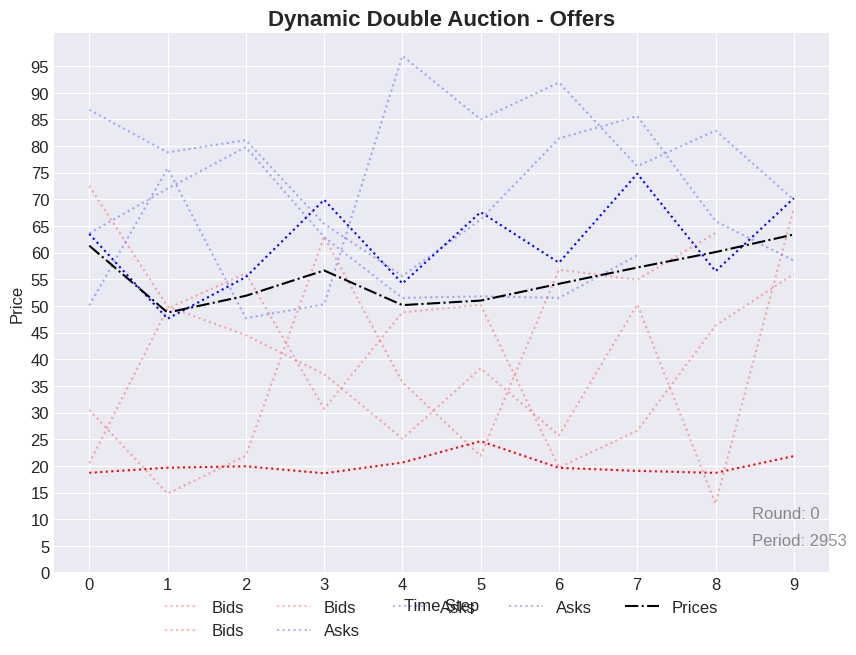

In [11]:
log.graphOffers(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [12]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/50), trackBuyersIdx = [0])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'memory' contains your data
memory = pd.DataFrame(buyers[0].algo.memory, columns=['state', 'action', 'reward', 'newState', 'done'])

# Calculate the rolling mean and standard deviation for actions and rewards
window_size = 100  # You can adjust the window size as needed
rolling_action_mean = memory['action'].rolling(window=window_size).mean()
rolling_reward_mean = memory['reward'].rolling(window=window_size).mean()
rolling_action_std = memory['action'].rolling(window=window_size).std()
rolling_reward_std = memory['reward'].rolling(window=window_size).std()

# Plot the rolling means and standard deviations separately for actions and rewards
plt.figure(figsize=(12, 6))

# Plot Rolling Mean and Std for Actions
plt.subplot(2, 1, 1)
plt.plot(rolling_action_mean, label='Rolling Mean of Actions')
plt.fill_between(
    range(len(memory)),
    rolling_action_mean - rolling_action_std,
    rolling_action_mean + rolling_action_std,
    alpha=0.3,
    label='Rolling Std of Actions'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Actions')

# Plot Rolling Mean and Std for Rewards
plt.subplot(2, 1, 2)
plt.plot(rolling_reward_mean, label='Rolling Mean of Rewards')
plt.fill_between(
    range(len(memory)),
    rolling_reward_mean - rolling_reward_std,
    rolling_reward_mean + rolling_reward_std,
    alpha=0.3,
    label='Rolling Std of Rewards'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Rewards')

plt.tight_layout()
plt.show()
